<h1>Code for Experiment 313</h1>
Below is the code used for the data analysis for Experiment 313. The imported array was constructed using the supplied tracking code; it consists of the pixel distance along the screen at each frame.

Imported modules:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
import uncertainties.umath as u
from scipy.optimize import root_scalar
from numpy import pi

Known quantities:

In [2]:
d = ufloat(10, 0.05)*0.01/2
a = ufloat(4.22, 0.05)*0.01
L = ufloat(1.3, 0.01)
M = ufloat(1.5, 0.005)
m_ratio = ufloat(0.06, 0.01)

The data array can be converted to physical distance via the conversion in the report. The pixel distance between two lines 15cm apart was found to be 290px, meaning each pixel corresponds to 0.517mm.

In [3]:
data = np.array([293, 293, 292, 293, 293, 293, 293, 293, 293, 295, 295, 294, 295,
       295, 296, 296, 296, 298, 298, 298, 297, 298, 299, 298, 298, 296,
       296, 296, 297, 297, 296, 297, 296, 296, 298, 298, 297, 296, 296,
       297, 298, 295, 295, 296, 296, 294, 296, 296, 296, 296, 296, 295,
       294, 293, 293, 292, 292, 293, 293, 294, 293, 292, 292, 293, 292,
       292, 294, 293, 290, 292, 293, 292, 293, 291, 290, 289, 287, 283,
       279, 277, 270, 264, 258, 251, 241, 238, 229, 222, 215, 206, 198,
       194, 187, 183, 177, 173, 171, 169, 165, 163, 162, 165, 164, 168,
       170, 170, 176, 180, 185, 191, 196, 204, 211, 217, 224, 234, 237,
       246, 251, 259, 264, 268, 271, 276, 278, 281, 283, 284, 283, 283,
       282, 282, 277, 275, 270, 269, 262, 260, 250, 247, 237, 232, 228,
       221, 214, 210, 203, 199, 192, 187, 183, 181, 179, 174, 174, 173,
       171, 172, 175, 176, 178, 181, 183, 189, 192, 197, 204, 209, 214,
       221, 226, 229, 239, 242, 247, 254, 256, 262, 266, 269, 270, 273,
       274, 275, 276, 276, 275, 273, 268, 268, 264, 261, 255, 251, 247,
       240, 235, 230, 224, 219, 214, 209, 204, 200, 196, 193, 187, 185,
       182, 180, 179, 179, 179, 178, 177, 182, 184, 186, 190, 195, 199,
       203, 206, 212, 217, 223, 229, 235, 235, 242, 247, 251, 254, 257,
       261, 269, 269, 270, 270, 269, 270, 269, 268, 267, 266, 263, 259,
       253, 251, 246, 243, 238, 233, 227, 224, 221, 214, 211, 205, 203,
       198, 196, 193, 190, 189, 187, 185, 186, 187, 187, 188, 188, 191,
       194, 198, 201, 203, 207, 213, 215, 217, 224, 229, 234, 237, 241,
       244, 248, 252, 257, 260, 260, 263, 264, 265, 265, 265, 263, 262,
       261, 258, 255, 254, 250, 248, 243, 241, 236, 231, 227, 223, 221,
       216, 213, 207, 205, 204, 200, 196, 195, 194, 193, 192, 191, 191,
       191, 193, 193, 195, 196, 203, 203, 206, 211, 215, 218, 222, 227,
       229, 234, 238, 240, 242, 247, 249, 252, 254, 257, 256, 259, 260,
       261, 260, 260, 259, 257, 255, 250, 250, 245, 244, 241, 236, 233,
       230, 228, 224, 217, 212, 212, 210, 207, 204, 200, 198, 198, 200,
       196, 194, 195, 197, 195, 197, 199, 200, 203, 205, 209, 210, 214,
       216, 221, 222, 227, 230, 231, 234, 237, 241, 244, 246, 247, 249,
       251, 253, 253, 253, 257, 253, 253, 253, 250, 250, 246, 246, 243,
       241, 237, 234, 232, 230, 226, 220, 218, 217, 214, 212, 209, 205,
       202, 205, 199, 202, 201, 198, 199, 200, 201, 201, 203, 203, 204,
       207, 210, 214, 217, 218, 222, 224, 228, 232, 233, 234, 240, 244,
       244, 245, 246, 249, 250, 249, 248, 250, 248, 249, 249, 249, 249,
       246, 244, 242, 238, 239, 235, 233, 231, 228, 222, 222, 218, 216,
       212, 213, 209, 204, 207, 205, 204, 204, 200, 204, 204, 203, 205,
       206, 207, 209, 209, 211, 213, 216, 221, 221, 222, 224, 228, 231,
       232, 236, 237, 242, 241, 244, 244, 245, 249, 248, 247, 249, 247,
       247, 247, 247, 246, 243, 241, 237, 238, 235, 233, 232, 230, 229,
       226, 221, 218, 218, 215, 212, 210, 212, 210, 209, 209, 207, 205,
       205, 206, 210, 209, 208, 211, 211, 212, 214, 215, 218, 219, 221,
       226, 228, 230, 232, 234, 235, 237, 240, 238, 241, 244, 243, 245,
       245, 245, 244, 246, 244, 243, 241, 241, 240, 237, 237, 234, 232,
       233, 228, 228, 226, 223, 222, 220, 218, 216, 213, 214, 212, 212,
       211, 208, 209, 208, 208, 208, 211, 212, 211, 212, 212, 214, 217,
       219, 221, 221, 223, 224, 228, 228, 231, 231, 232, 234, 236, 238,
       240, 240, 239, 245, 243, 241, 241, 242, 241, 240, 239, 238, 238,
       237, 236, 233, 231, 230, 228, 227, 225, 223, 221, 218, 220, 217,
       213, 215, 214, 214, 212, 212, 213, 213, 212, 212, 211, 212, 212,
       215, 215, 216, 218, 218, 221, 223, 223, 225, 227, 229, 232, 231,
       234, 237, 234, 236, 239, 239, 240, 240, 240, 240, 242, 240, 240,
       240, 239, 237, 238, 232, 233, 232, 232, 230, 225, 224, 223, 224,
       221, 222, 219, 219, 216, 218, 215, 215, 212, 212, 213, 213, 213,
       213, 212, 213, 213, 215, 216, 218, 220, 220, 221, 222, 223, 226,
       226, 228, 230, 231, 232, 234, 236, 237, 238, 237, 238, 240, 237,
       237, 237, 238, 236, 236, 236, 238, 235, 234, 232, 232, 230, 228,
       227, 228, 226, 222, 223, 222, 221, 220, 218, 218, 216, 216, 216,
       214, 213, 212, 213, 216, 215, 218, 216, 217, 218, 222, 221, 221,
       222, 222, 225, 225, 227, 230, 230, 230, 231, 232, 235, 234, 236,
       236, 235, 237, 237, 235, 237, 237, 236, 236, 234, 234, 235, 233,
       231, 230, 229, 228, 227, 229, 225, 223, 222, 222, 221, 220, 219,
       217, 217, 216, 218, 216, 217, 217, 215, 217, 216, 216, 217, 219,
       220, 221, 221, 222, 223, 222, 226, 227, 228, 229, 230, 231, 230,
       233, 232, 232, 234, 235, 234, 235, 236, 236, 236, 235, 235, 234,
       235, 234, 232, 232, 229, 229, 229, 227, 227, 225, 225, 223, 222,
       222, 221, 221, 219, 220, 218])
pixeltolen = 0.15/290
s = data*pixeltolen

The recording was 2 hours, 8 minutes and 0 seconds long. There were 877 frames, equally spaced. From this, both the time array and the fps can be constructed.

In [4]:
fps = 877/(2*3600 + 8*60)
t = np.linspace(0, 2*3600 + 8*60, len(data))
print(f'The recording ran at {fps:.3g}fps.')

The recording ran at 0.114fps.


From visual inspection, it was seen that the *active* oscillations started close to the 70th frame. Hence, all of the data fitting should be done on the succeeding parts of the data. Moreover, $s(0)$ should be calculated as the average of the preceding data, and its uncertainty is calculated as its range.

In [5]:
t_a = t[70:]
s_a = s[70:]
# Averaging
s_init = 0
for i in range(71):
    s_init += 1/71*s[i]
# Finding range using the max and min.
minS = 10000
maxS = 0
for i in range(71):
    if s[i] < minS:
        minS = s[i]
    if s[i] > maxS:
        maxS = s[i]
delta_s0 = (maxS - minS)/2
s_init = ufloat(s_init, delta_s0)

To find $\omega$ and $\alpha$ as needed in the report, they must be fitted to the function defined in the report. This is most easily done using a nonlinear algorithm, which means guesses must be defined for the original parameters.

In [6]:
def s_fit(t, phi, A, alpha, omega, s_fin):
    return A*np.exp(-alpha*t)*np.cos(omega*t + phi) + s_fin

# Estimation of parameters
T_g = 9*60 # estimated based on the recording
omega_g = 2*pi/T_g

T_st = 8*60
phi_g = np.mod(-omega_g*T_st, 2*pi)

alpha_g = (1/T_g)*np.log(3/2.6) # From inspection, also R = e^(-alpha T)

s_ave = 0
for i in range(len(data)-200):
    s_ave += 1/(len(data) - 200)*s[i]
s_fin_g = s_ave # Taken as the average position over active oscillations.

A_g = np.abs(s_ave - s_init.nominal_value)

The Levenberg-Marquardt algorithm was used to fit the curve. Uncertainties in the fitted parameters were calculated using the square root of the diagonal elements of the covariance matrix. All printed values are given in SI units.

In [7]:
p, cov = curve_fit(s_fit, t_a, s_a, p0=[phi_g, A_g, alpha_g, omega_g, s_fin_g], \
                   sigma=0.0134*np.ones(len(t_a)), absolute_sigma=True)
delta = np.sqrt(np.diag(cov))
s_fitted = s_fit(t_a, *p)

values = []
for i in range(len(p)):
    values += [ufloat(p[i], delta[i])]

names = ['\u03C6', 'A', '\u03B1', '\u03C9', 'Centre of data:']
for i in range(len(p)):
    print(f'{names[i]}: {p[i]:.3g} \u00B1 {delta[i]:.2g}')

phi = values[0]
A = values[1]
alpha = values[2]
omega = values[3]
s0 = -(values[4]-s_init)/2
print(f's0 = {s0}')

φ: -1.89 ± 0.072
A: 0.0417 ± 0.0029
α: 0.00029 ± 2.7e-05
ω: 0.0129 ± 2.7e-05
Centre of data:: 0.117 ± 0.00047
s0 = 0.0178+/-0.0012


The values can be used to draw the plots given in the report, and to calculate the chi-square value of the fit.

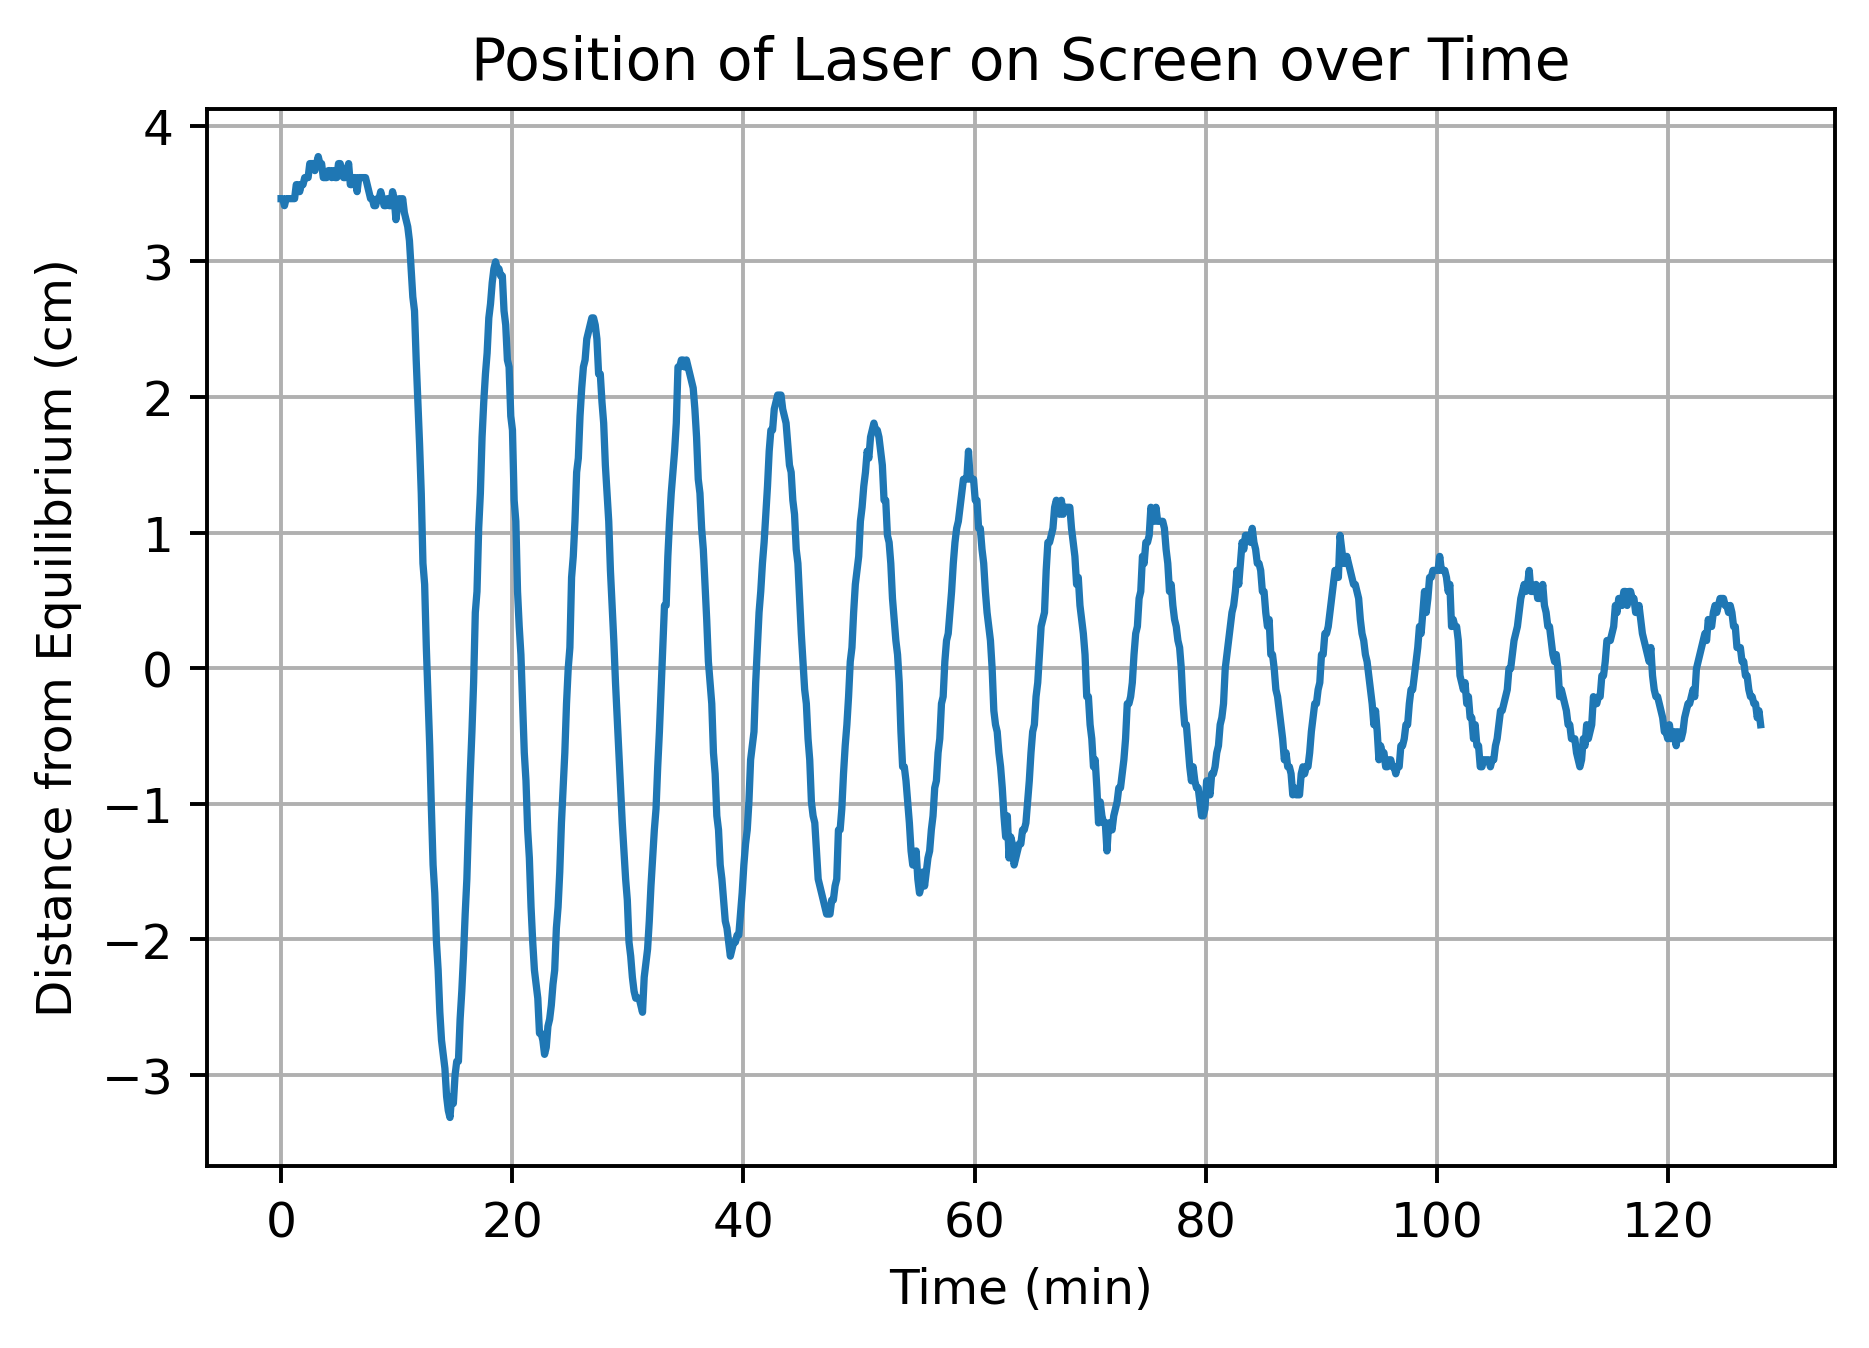

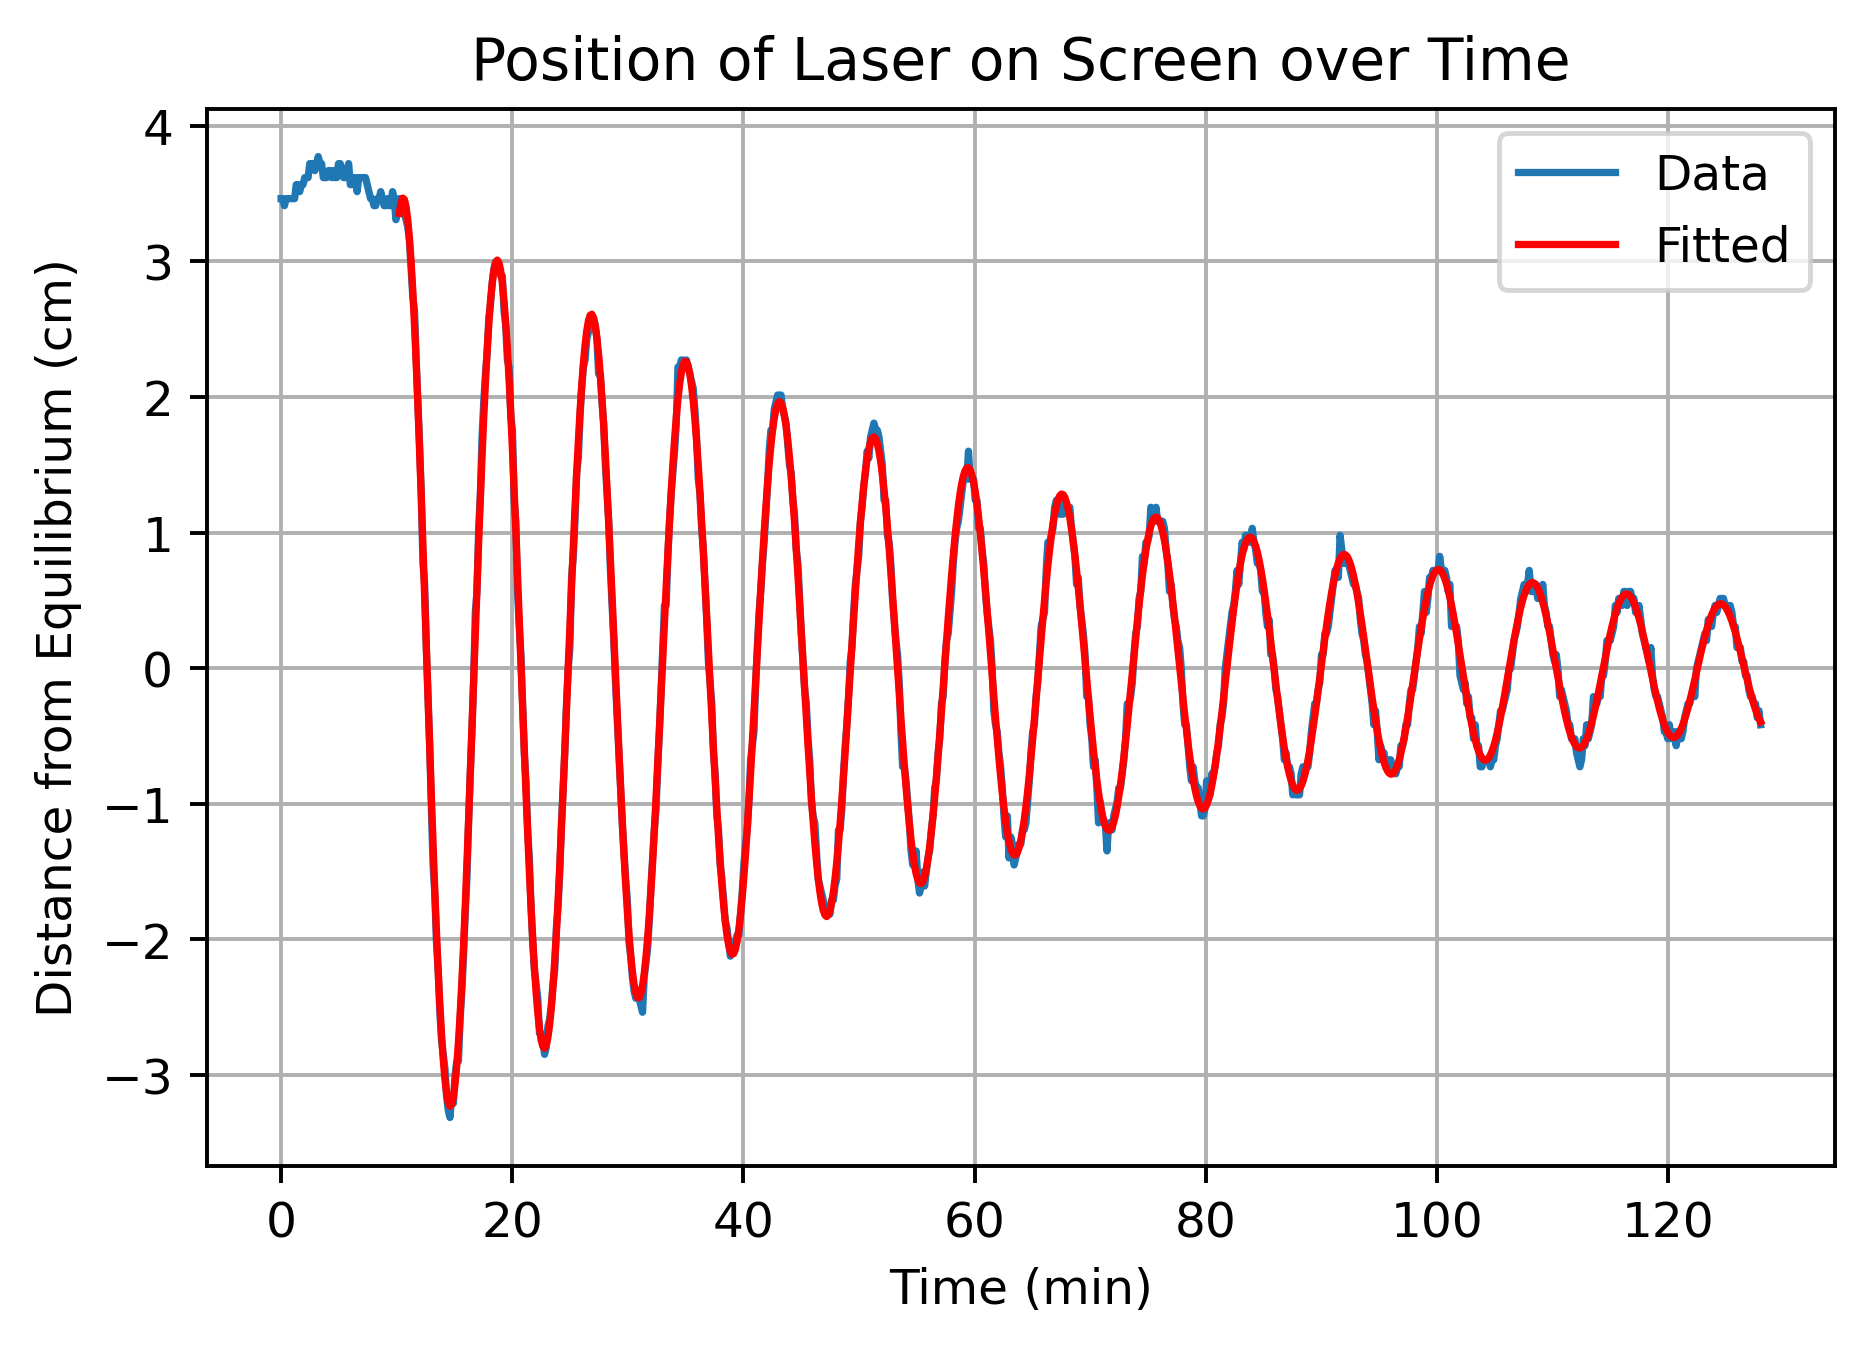

The normalized chi-square value for the fit is 0.5793.


In [8]:
plt.figure(dpi=350)
plt.title('Position of Laser on Screen over Time')
plt.xlabel('Time (min)')
plt.ylabel('Distance from Equilibrium (cm)')
plt.plot(t/60, (s - values[4].nominal_value)*100, label='Data')
plt.grid()
plt.show()

plt.figure(dpi=350)
plt.grid()
plt.title('Position of Laser on Screen over Time')
plt.xlabel('Time (min)')
plt.ylabel('Distance from Equilibrium (cm)')
plt.plot(t/60, (s - values[4].nominal_value)*100, label='Data')
plt.plot(t_a/60, (s_fitted - values[4].nominal_value)*100, color='red', label='Fitted')
plt.legend()
plt.show()

chi_square = np.cumsum(((s_fitted - s_a)/(pixeltolen*20))**2)[-1]/5
print(f'The normalized chi-square value for the fit is {chi_square:.4g}.')

Finally, the value of $G$ can be estimated.

In [9]:
theta0 = s0/(2*L)
b0 = a - d*u.sin(theta0)
G_1 = (omega**2 * b0**2 * d*theta0)/(M)
G_2 = G_1 * (1 + 2*b0**2 * d*theta0 /(a**3))
G_3 = G_2 * (1 + (alpha/omega)**2)
G_4 = G_3 * (1 + m_ratio/6)
print(f'First estimate of G: {G_1}')
print(f'Second estimate of G: {G_2}')
print(f'Third estimate of G: {G_3}')
print(f'Fourth estimate of G: {G_4}')

gamma = (b0**3 + b0**2 * d*2*theta0)/(b0**2 + 4*d**2 + 4*b0*d*theta0)**1.5
G_f = G_4/(1 - gamma)
print(f'Final estimate of G: {G_f}')

First estimate of G: (6.6+/-0.5)e-11
Second estimate of G: (6.7+/-0.5)e-11
Third estimate of G: (6.7+/-0.5)e-11
Fourth estimate of G: (6.8+/-0.5)e-11
Final estimate of G: (7.2+/-0.5)e-11


<h2>Correcting for the misalignment of the laser</h2>

In the report, it was mentioned that the laser was misaligned. This resulted in a new relationship betweeon $\theta_0$ and $s_0$.

In [10]:
laser_x = ufloat(0.19, 0.005)
laser_y = ufloat(0.75, 0.005)
phi = u.atan(laser_x/laser_y)

delta_phi = phi.std_dev
phi_n = phi.nominal_value
delta_s0 = s0.std_dev
s0_n = s0.nominal_value
delta_L = L.std_dev
L_n = L.nominal_value

# This function is zero for the right value of theta_0.
def f(theta0):
    return np.tan(2*theta0 + phi_n) - np.tan(-2*theta0 + phi_n) \
        - 2*s0_n/L_n

# Implementation of the secant method to solve the equation for theta_0.
P = root_scalar(f, x0=0, x1=0.5)
theta0 = P.root

sec1 = 1/np.cos(phi_n+2*theta0)**2
sec2 = 1/np.cos(phi_n-2*theta0)**2
# Implementation of the uncertainty formula.
delta_theta0 = np.sqrt((2*delta_s0/L_n)**2 + (sec1 - sec2)**2*delta_phi + (2*s0_n*delta_L/L_n**2)**2)/(2*(sec1 + sec2))

theta0 = ufloat(theta0, delta_theta0)
print(theta0)

0.0064+/-0.0005


This value of $\theta_0$ is the corrected value, which results in new estimates for $G$:

In [11]:
b0 = a - d*u.sin(theta0)
G_1 = (omega**2 * b0**2 * d*theta0)/(M)
G_2 = G_1 * (1 + 2*b0**2 * d*theta0 /(a**3))
G_3 = G_2 * (1 + (alpha/omega)**2)
G_4 = G_3 * (1 + m_ratio/6)
print(f'First estimate of G: {G_1}')
print(f'Second estimate of G: {G_2}')
print(f'Third estimate of G: {G_3}')
print(f'Fourth estimate of G: {G_4}')

gamma = (b0**3 + b0**2 * d*2*theta0)/(b0**2 + 4*d**2 + 4*b0*d*theta0)**1.5
G_f = G_4/(1 - gamma)
print(f'Final estimate of G: {G_f}')

First estimate of G: (6.2+/-0.5)e-11
Second estimate of G: (6.3+/-0.5)e-11
Third estimate of G: (6.3+/-0.5)e-11
Fourth estimate of G: (6.4+/-0.5)e-11
Final estimate of G: (6.8+/-0.6)e-11


<h2>Fitting values to the passive oscillations</h2>

It was suggested in the report to measure $s_0$ by fitting the function above to the passive oscillations, and seeing what the equilibrium value is. This was not used to derive the value used for estimates, but a graph was drawn to illustrate it.

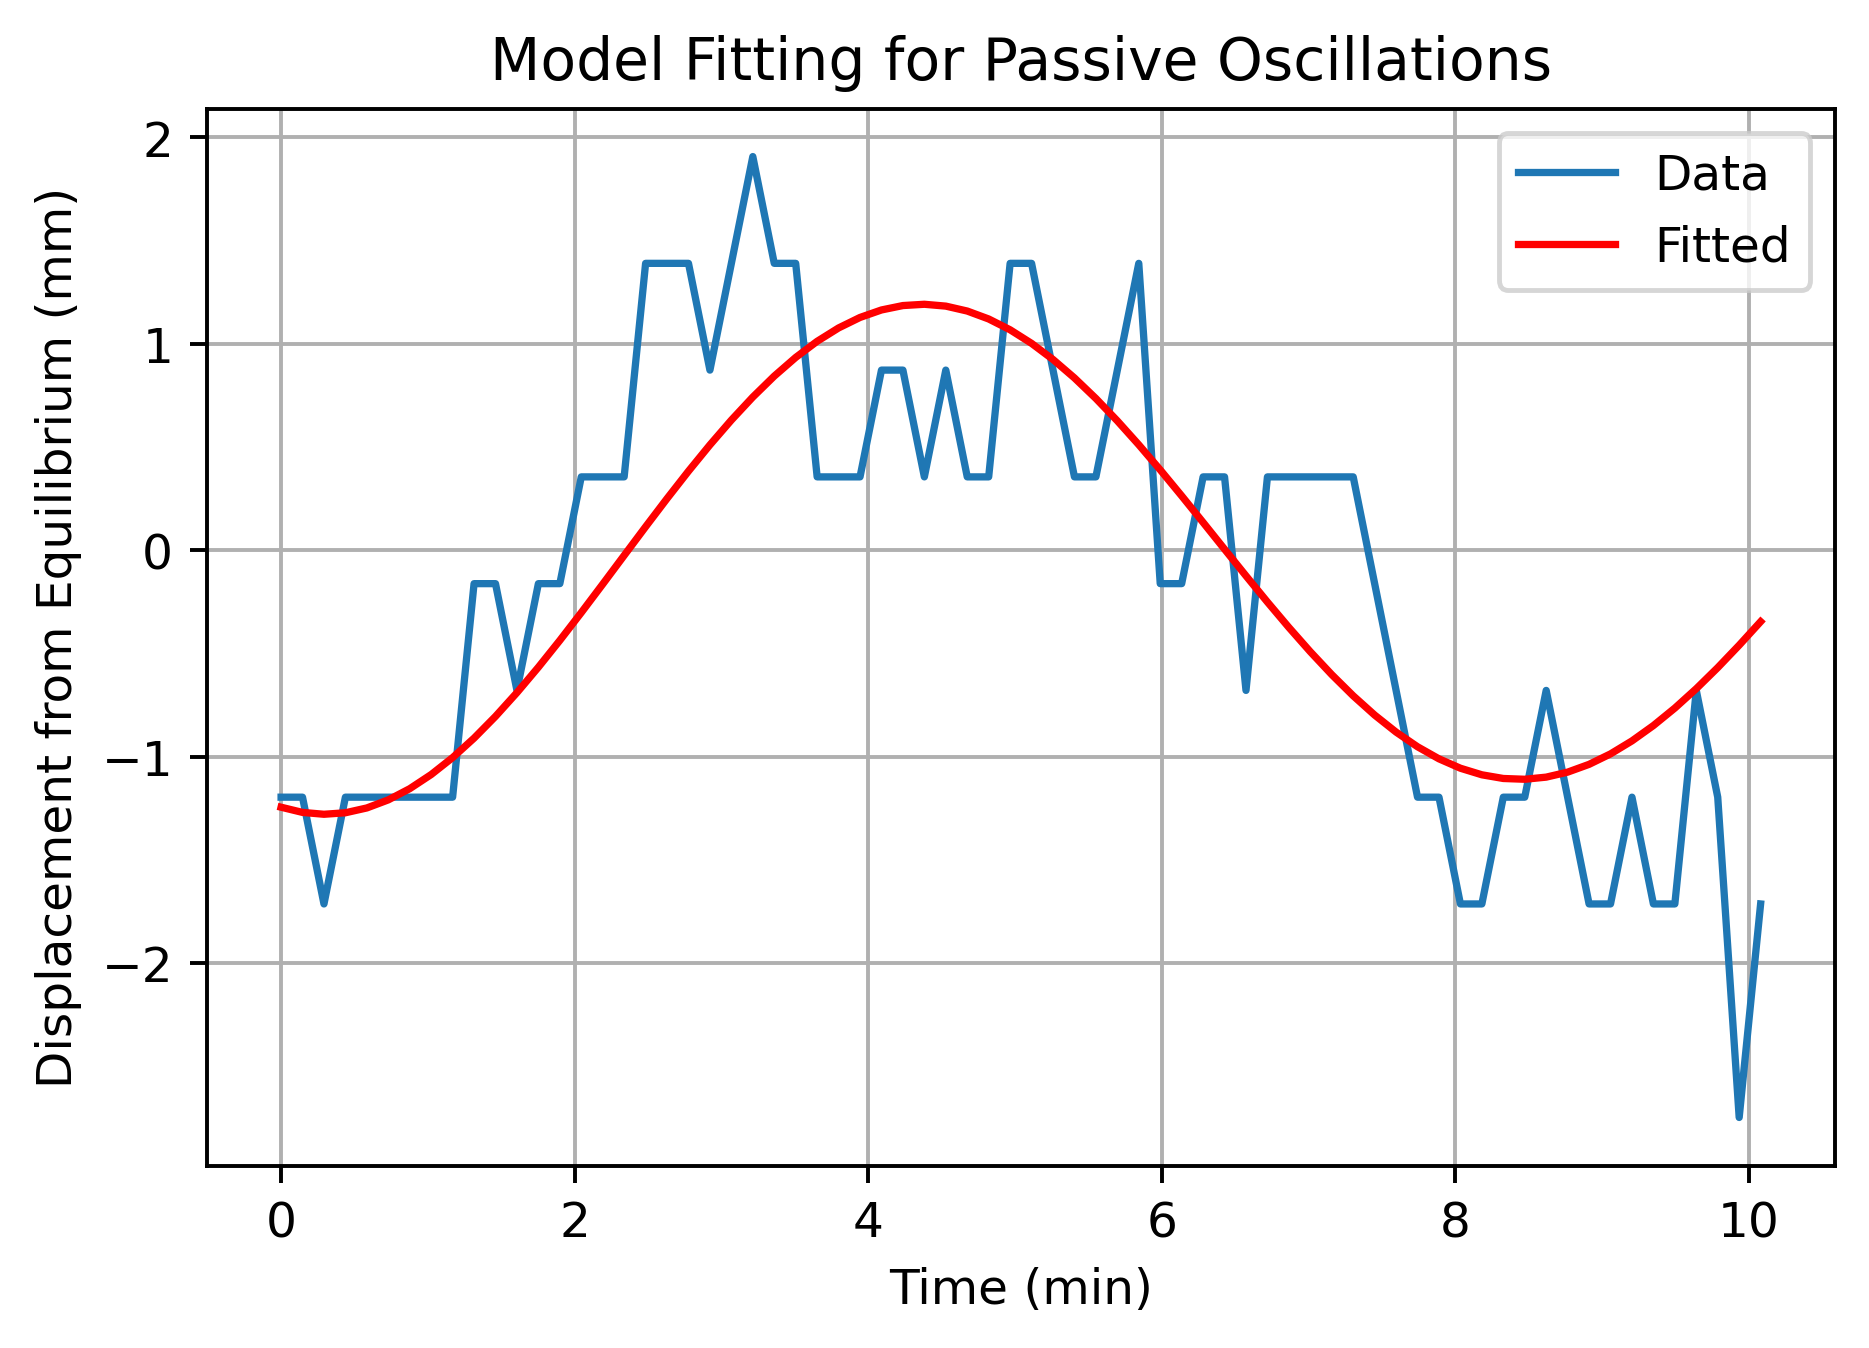

In [12]:
def s_fit2(t, phi, A, s_fin):
    return s_fit(t, phi, A, alpha.nominal_value, omega.nominal_value, s_fin)

# Guesses were estimated via inspection.
p2, cov2 = curve_fit(s_fit2, t[:70], s[:70], p0=[0, 0.005, 0.13], sigma=0.0134*np.ones(70), absolute_sigma=True)
unc = np.sqrt(np.diag(cov2))
plt.figure(dpi=350)
plt.title('Model Fitting for Passive Oscillations')
plt.xlabel('Time (min)')
plt.ylabel('Displacement from Equilibrium (mm)')
plt.plot(t[:70]/60, (s[:70] - p2[2])*1000, label='Data')
plt.plot(t[:70]/60, (s_fit2(t[:70], *p2)-p2[2])*1000, color='red', label='Fitted')
plt.grid()
plt.legend()
plt.show()